# The real stuff


## Reference genome and sequencing reads

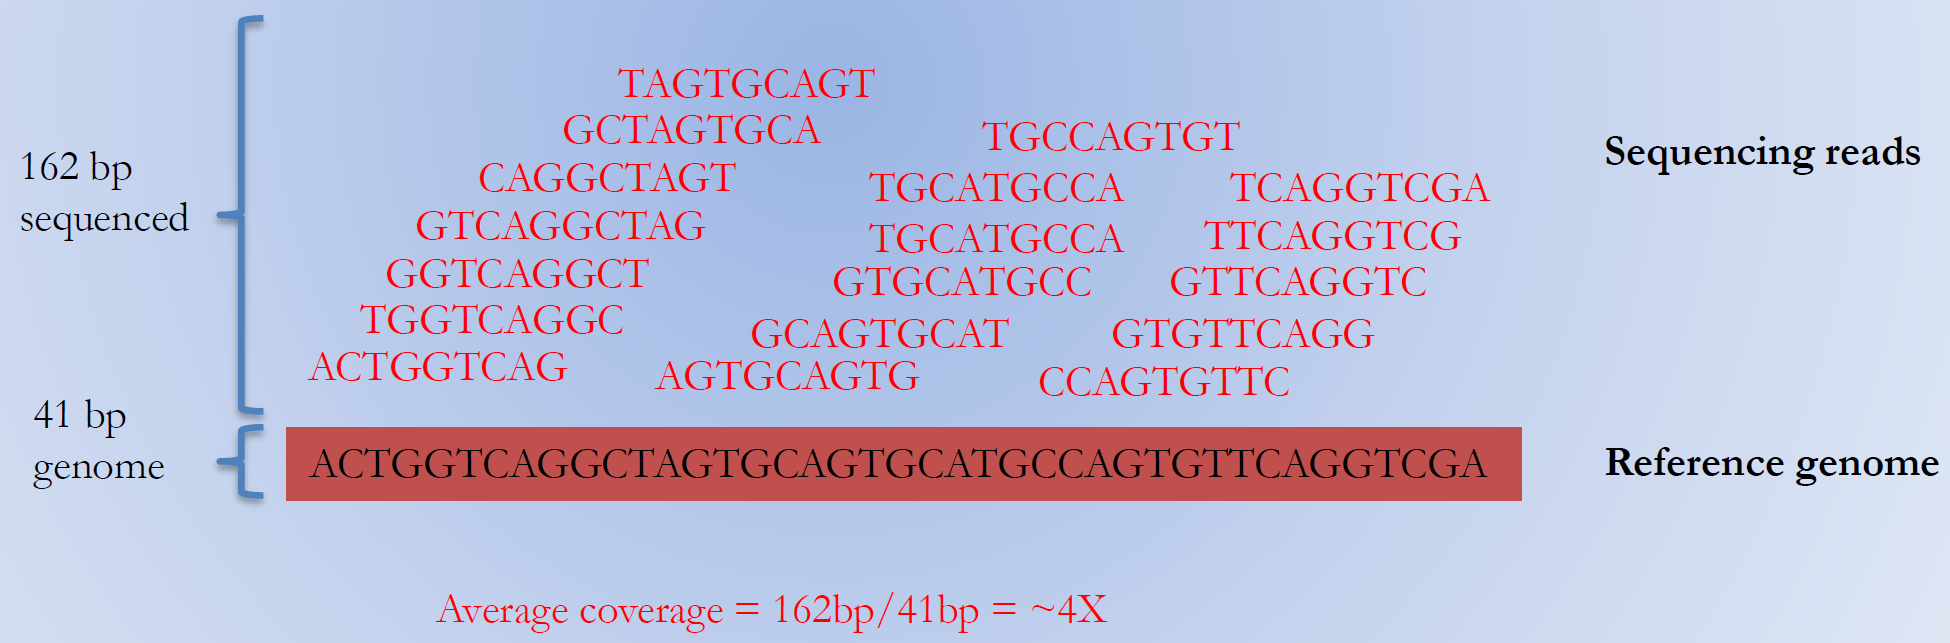

`cd ~/notebooks/basics/data/`

`wget https://ucloud.univie.ac.at/index.php/s/riZ9MpAHQvMwiVG/download`

`tar -zxvf download`

A fasta file is a string of letters, representing a sequence (e.g. a genome of ~3.5 Gbp).

`less hg19.fa`

A fastq file is the raw sequencing data.

`tar -zxvf sample_seq.fq.tar.gz`

`less sample_seq.fq`

Header: read id, sequence info, read pair

Sequence: ATGCGCGTATCGATGCTATGC… bla bla

Qualities: confidence for each base called (ASCII)



## Mapping & SAM/BAM files
Finding where in the genome a short sequencing fragment belongs.

Doing that for millions of lines is a challenge - algorithmic abbreviations.

**BWA**

`bwa mem -R '@RG\tID:1\tSM:1' chr21.fa sample_seq.fq > sample.sam`

Output: SAM file - a file that contains the sequence and its coordinates on the 23 chromosomes.

BAM or CRAM: compressed versions of such files

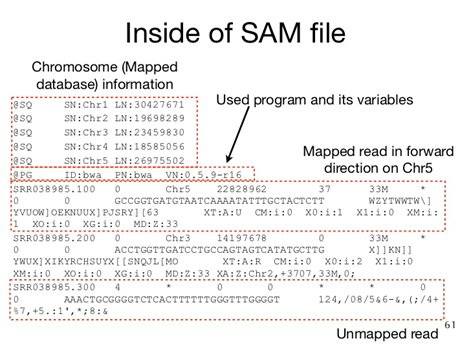

* Read information
* Position in the genome
* Mapping quality
* Information from FASTQ (Sequence & quality)
* CIGAR (alignment)
* Other stuff



## Something to do with SAM files

* How many reads are there?

* How many reads were mapped to chr21?

**samtools**

Common tool to do things with these alignment files.

`samtools sort -uO SAM sample.sam > sample.sorted.sam`

Let's inspect!

 **binary files**

`samtools sort sample.sam > sample.sorted.bam`

`samtools index sample.sorted.bam`

Now look at this file. What is happening?


Next step: calling genotypes.

## Genotypes!

Start with installing  a program we need:

`conda install -y -c bioconda gatk4`

While this is running, let's talk about genotype calling: Getting a list of positions in the genome and which allele an individual carries. This is the information you actually want to know from genomic data.

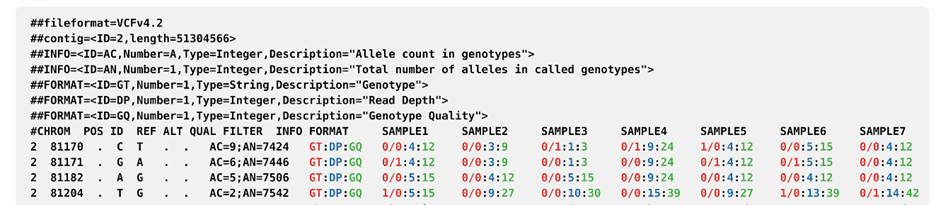

* Header
* Position
* Alleles
* Info
* Genotypes

**GATK**

Genome Analysis ToolKit: Most common tool to get genotypes from sequencing data.

Then, we can run GATK to call the genotypes

`gatk --java-options "-Xmx2g" HaplotypeCaller -R chr21.fa -I sample.sorted.bam -ERC BP_RESOLUTION -O sample.vcf.gz`

Let's inspect the output!


## Something you may do with the VCF file

* How many SNPs are in the VCF file?


* What is the position of the first and the last SNP?


* Here is another vcf file. Can you see some differences to the one you just created?
wget https://ucloud.univie.ac.at/index.php/s/sjVDEgg2KDvI9u8/download
tar -zxvf download
less sample2.vcf.gz
